In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import optimizers


In [ ]:
df_train = pd.read_csv("CropTrainFinal.csv")
df_test = pd.read_csv("CropTestFinal.csv")
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_train.head(14)

,Area,Production,Rainfall,Season,Temperature,Crop
0,7800.0,3200.0,30.400333,Kharif,28.007000,Moong(Green Gram)
1,39922.0,75572.0,111.901000,Kharif,27.232333,Maize
2,44656.0,49099.0,3.396500,Rabi,20.277000,Wheat
3,6540.0,3945.0,30.932500,Rabi,24.241500,Wheat
4,2911.0,2062.0,189.208333,Kharif,27.456333,Maize
5,7.0,2.0,21.609750,Rabi,23.570000,Moong(Green Gram)
6,18.0,21.0,206.319750,Summer,28.760250,Groundnut
7,39157.0,1878596.0,186.938333,Kharif,27.940667,Sugarcane
8,10562.0,16812.0,81.593333,Kharif,26.181000,Jowar
9,179.0,2174.0,68.501750,Rabi,24.139750,Potato


In [ ]:
y_train = df_train['Production']
y_test = df_test['Production']
df_train = df_train.drop(['Production'], axis=1)
df_test = df_test.drop(['Production'], axis=1)

In [ ]:
df_train.head(10)

,Area,Rainfall,Season,Temperature,Crop
0,7800.0,30.400333,Kharif,28.007000,Moong(Green Gram)
1,39922.0,111.901000,Kharif,27.232333,Maize
2,44656.0,3.396500,Rabi,20.277000,Wheat
3,6540.0,30.932500,Rabi,24.241500,Wheat
4,2911.0,189.208333,Kharif,27.456333,Maize
5,7.0,21.609750,Rabi,23.570000,Moong(Green Gram)
6,18.0,206.319750,Summer,28.760250,Groundnut
7,39157.0,186.938333,Kharif,27.940667,Sugarcane
8,10562.0,81.593333,Kharif,26.181000,Jowar
9,179.0,68.501750,Rabi,24.139750,Potato


In [ ]:
cr = LabelEncoder()
se = LabelEncoder()
df_train['Season'] = se.fit_transform(df_train['Season'])
df_train['Crop'] = cr.fit_transform(df_train['Crop'])
df_test['Season'] = se.transform(df_test['Season'])
df_test['Crop'] = cr.transform(df_test['Crop'])

In [ ]:
x_train = df_train.values

In [ ]:
x_test = df_test.values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [ ]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
maerandom = mean_absolute_error(y_test, y_pred)
maerandom

20805.78856859866

In [ ]:
# applying neural network
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((85225, 5), (85225,), (21307, 5), (21307,))

In [ ]:
# scaling data:
scaler = StandardScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_testscaled = scaler.transform(x_test)

In [ ]:
# randomForest on scaled data:
clf1=RandomForestRegressor()
clf1.fit(x_trainscaled,y_train)

RandomForestRegressor()

In [ ]:
ypredranscaled=clf1.predict(x_testscaled)

In [ ]:
maerandomscaled = mean_absolute_error(ypredranscaled,y_test)

In [ ]:
maerandomscaled

21148.427681996287

In [ ]:
randommeanlist = [maerandom, maerandomscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

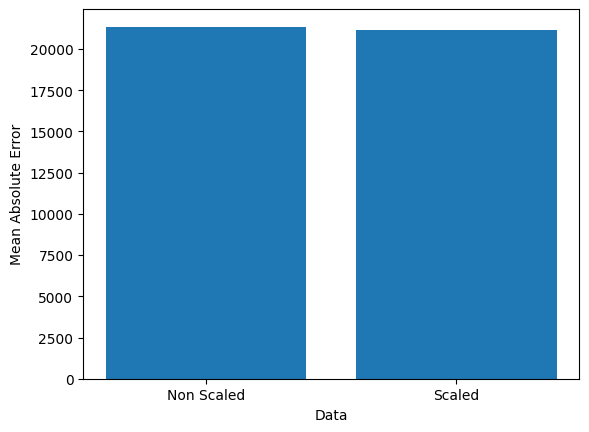

In [ ]:
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# keras implementation.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(512, input_dim=x_trainscaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=optimizer)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_trainscaled, y_train, epochs=200, batch_size=50)

Epoch 1/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 64316.1797
Epoch 2/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 57199.2305
Epoch 3/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 56733.4688
Epoch 4/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 57921.3438
Epoch 5/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 54255.7891
Epoch 6/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 56248.6836
Epoch 7/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 61951.3633
Epoch 8/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 54315.4492
Epoch 9/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 51997.2344
Epoch 10/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 50074.4180
Epoch 11/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 50763.8203
Epoch 12/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 49381.9766
Epoch 13/200
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 47393.3086
Epoch 14/200
1705/1

In [ ]:
ypredkeras = model.predict(x_testscaled)
maekeras_scaled=mean_absolute_error(y_test, ypredkeras)

666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics for the Keras ANN model
mae_keras_scaled = mean_absolute_error(y_test, ypredkeras)
mse_keras_scaled = mean_squared_error(y_test, ypredkeras)
r2_keras_scaled = r2_score(y_test, ypredkeras)

# Print results
print("Keras ANN Model (Scaled Data):")
print(f"Mean Absolute Error (MAE): {mae_keras_scaled}")
print(f"Mean Squared Error (MSE): {mse_keras_scaled}")
print(f"R² Score: {r2_keras_scaled}")


Keras ANN Model (Scaled Data):
Mean Absolute Error (MAE): 20204.38791905736
Mean Squared Error (MSE): 27131670028.929607
R² Score: 0.9148195210492279


In [ ]:
from tensorflow.keras.optimizers import Nadam
model1 = Sequential()
model1.add(Dense(512, input_dim=x_trainscaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model1.add(Dropout(0.3))
model1.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model1.add(Dense(1))
model1.compile(loss=tf.keras.losses.Huber(delta=1.0), optimizer=Nadam(learning_rate=0.001))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.fit(x_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 58952.9805
Epoch 2/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 58506.7734
Epoch 3/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 58056.8984
Epoch 4/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 58481.1523
Epoch 5/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 61166.1367
Epoch 6/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 61396.1602
Epoch 7/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 59498.7422
Epoch 8/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 62222.9453
Epoch 9/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 61415.6328
Epoch 10/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 58355.1758
Epoch 11/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 61064.4922
Epoch 12/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 61042.2500
Epoch 13/100
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 59280.1055
Epoch 14/100
1705/170

In [ ]:
ypredkeras1 = model1.predict(x_test)
maekeras=mean_absolute_error(y_test, ypredkeras1)

666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics for the Keras ANN model with Nadam optimizer
mae_keras_nadam = mean_absolute_error(y_test, ypredkeras1)
mse_keras_nadam = mean_squared_error(y_test, ypredkeras1)
r2_keras_nadam = r2_score(y_test, ypredkeras1)

# Print results
print("Keras ANN Model (Nadam Optimizer):")
print(f"Mean Absolute Error (MAE): {mae_keras_nadam}")
print(f"Mean Squared Error (MSE): {mse_keras_nadam}")
print(f"R² Score: {r2_keras_nadam}")


In [ ]:
kerasmeanlist = [maekeras, maekeras_scaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

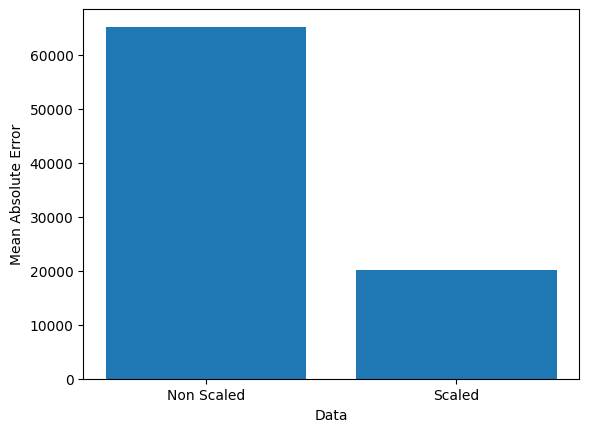

In [ ]:
plt.bar(namerandom,kerasmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1))


In [ ]:
svr_model.fit(x_trainscaled, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, gamma=0.1))])

In [ ]:
y_pred_svr = svr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics for the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("SVR Model:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R² Score: {r2_svr}")


SVR Model:
Mean Absolute Error (MAE): 101789.36899273754
Mean Squared Error (MSE): 319742578779.91754
R² Score: -0.0038389075345410806


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': [0.01, 0.1, 1, 10],
    'svr__epsilon': [0.001, 0.01, 0.1, 0.5],
}
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='r2', verbose=3)


In [ ]:
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.01;, score=-0.015 total time= 7.2min
[CV 2/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.01;, score=-0.020 total time= 9.7min
[CV 3/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.01;, score=-0.021 total time= 9.5min
[CV 4/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.01;, score=-0.019 total time= 7.1min
[CV 5/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.01;, score=-0.019 total time= 7.1min
[CV 1/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.1;, score=-0.015 total time= 7.0min
[CV 2/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.1;, score=-0.020 total time= 7.6min
[CV 3/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.1;, score=-0.021 total time= 7.0min
[CV 4/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.1;, score=-0.019 total time= 7.1min
[CV 5/5] END svr__C=0.1, svr__epsilon=0.001, svr__gamma=0.1;, score=-0.019 total time= 

In [ ]:
y_pred_svr_scaled = svr_model.predict(x_testscaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics for the SVR model
mae_svr_sclaed = mean_absolute_error(y_test, y_pred_svr_scaled)
mse_svr_scaled = mean_squared_error(y_test, y_pred_svr_scaled)
r2_svr_scaled = r2_score(y_test, y_pred_svr_scaled)

# Print results
print("SVR Model:")
print(f"Mean Absolute Error (MAE): {mae_svr_sclaed}")
print(f"Mean Squared Error (MSE): {mse_svr_scaled}")
print(f"R² Score: {r2_svr_scaled}")

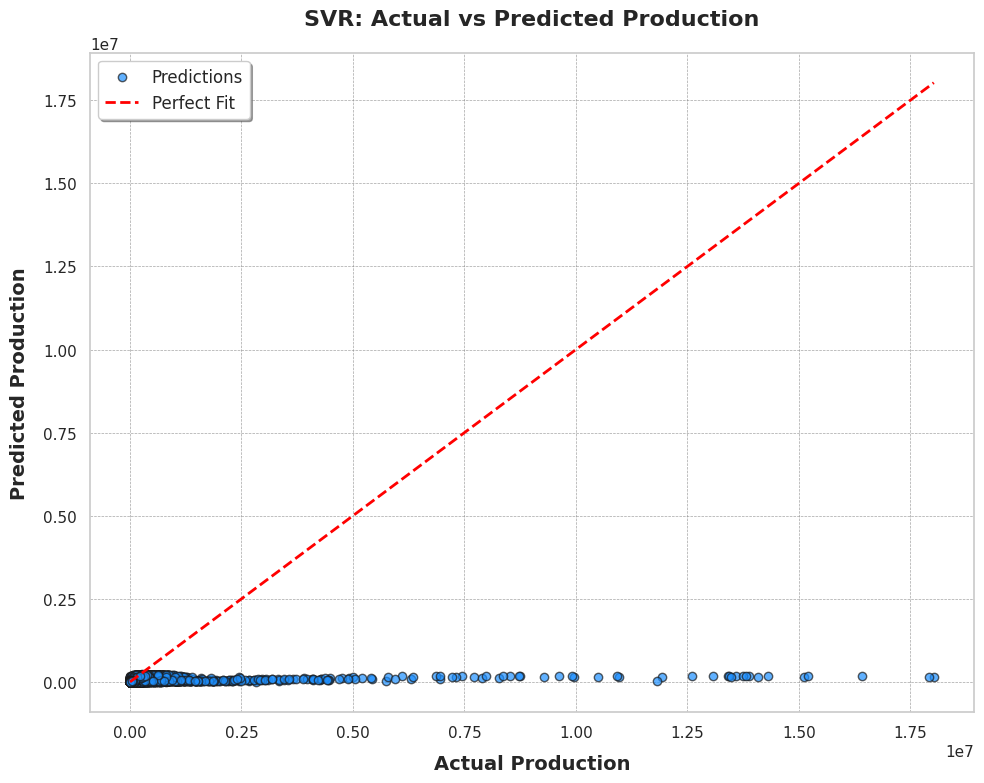

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))

plt.scatter(
    y_test, y_pred_svr,
    color='dodgerblue',
    alpha=0.7,
    edgecolor='k',
    label="Predictions"
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    linewidth=2,
    label="Perfect Fit"
)

plt.xlabel('Actual Production', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Predicted Production', fontsize=14, fontweight='bold', labelpad=10)
plt.title('SVR: Actual vs Predicted Production', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Using GridSearch to optimise randomforest:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor()
para_grid = {
    'n_estimators' : [20, 50, 100],
}
cv_rfc = GridSearchCV(estimator = rfc, param_grid = para_grid, cv = 3)
cv_rfc.fit(x_trainscaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [20, 50, 100]})

In [ ]:
yp1=cv_rfc.predict(x_testscaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating metrics for the optimized Random Forest model
mae_rf_optimized = mean_absolute_error(y_test, yp1)
mse_rf_optimized = mean_squared_error(y_test, yp1)
r2_rf_optimized = r2_score(y_test, yp1)

# Print results
print("Optimized Random Forest Model (GridSearch):")
print(f"Mean Absolute Error (MAE): {mae_rf_optimized}")
print(f"Mean Squared Error (MSE): {mse_rf_optimized}")
print(f"R² Score: {r2_rf_optimized}")


Optimized Random Forest Model (GridSearch):
Mean Absolute Error (MAE): 21132.548673443434
Mean Squared Error (MSE): 32728065993.307175
R² Score: 0.8972495119736511


In [ ]:
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
ypredlinear = clf_linear.predict(x_test)
maelinear=mean_absolute_error(y_test, ypredlinear)
# on scaled data:
clf_linearscaled = LinearRegression()
clf_linearscaled.fit(x_trainscaled, y_train)
ypredlinearscaled = clf_linearscaled.predict(x_testscaled)
maelinearscaled=mean_absolute_error(y_test, ypredlinearscaled)

In [ ]:
maelinearscaled = mean_absolute_error(y_test, ypredlinearscaled)
mselinearscaled = mean_squared_error(y_test, ypredlinearscaled)
r2linearscaled = r2_score(y_test, ypredlinearscaled)

# Print results
print("Linear Regression:")
print(f"Mean Absolute Error (MAE): {maelinearscaled}")
print(f"Mean Squared Error (MSE): {mselinearscaled}")
print(f"R² Score: {r2linearscaled}")

Linear Regression:
Mean Absolute Error (MAE): 114370.41071921558
Mean Squared Error (MSE): 287424590402.9202
R² Score: 0.0976241327332652


In [ ]:
linearmeanlist = [maelinear, maelinearscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

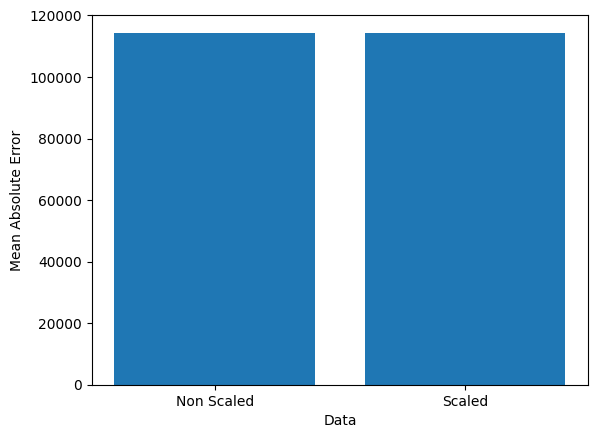

In [ ]:
plt.bar(namerandom,linearmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
#KNN neighbor
from sklearn.neighbors import KNeighborsRegressor
clfKNN = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN.fit(x_train, y_train)
ypredknn = clfKNN.predict(x_test)
knnmae=mean_absolute_error(y_test, ypredknn)


In [ ]:
clfKNN1 = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN1.fit(x_trainscaled, y_train)
ypredknnscaled = clfKNN1.predict(x_testscaled)
knnmaescaled=mean_absolute_error(y_test, ypredknnscaled)

In [ ]:
knnmaescaled = mean_absolute_error(y_test, ypredknnscaled)
knnmsescaled = mean_squared_error(y_test, ypredknnscaled)
knnr2scaled = r2_score(y_test, ypredknnscaled)

# Print results
print("KNN Model:")
print(f"Mean Absolute Error (MAE): {knnmaescaled}")
print(f"Mean Squared Error (MSE): {knnmsescaled}")
print(f"R² Score: {knnr2scaled}")

KNN Model:
Mean Absolute Error (MAE): 25533.936517413007
Mean Squared Error (MSE): 55369797495.669266
R² Score: 0.8261652944673366


In [ ]:
knnmeanlist = [knnmae, knnmaescaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

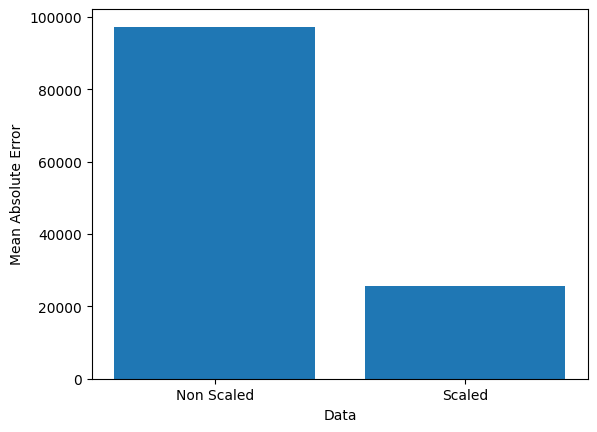

In [ ]:
plt.bar(namerandom,knnmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
# testing on diff neighbors:
x_ax = []
y_ax = []
for i in range(1, 50, 2):
    clfk = KNeighborsRegressor(n_neighbors = i, algorithm='ball_tree')
    clfk.fit(x_trainscaled, y_train)
    ypredk = clfk.predict(x_testscaled)
    mae = mean_absolute_error(y_test, ypredk)
    print(mae)
    x_ax.append(i)
    y_ax.append(mae)

26661.50120225039
25533.936517413007
27422.734093380383
30067.60935208777
32293.24176143029
33817.187822733234
35349.788221545816
37089.143757712
37987.403234840895
38904.77416175484
39958.799063448896
40780.45054344655
41517.23516161166
42296.350327927496
42867.18166403326
43543.10131928543
44242.93627654956
44639.053734060195
45134.95610996703
45777.0339837124
46066.34673301473
46492.313421348124
46942.329852633855
47311.215121701134
47584.427475834316


Text(0, 0.5, 'Mean Absolute Error')

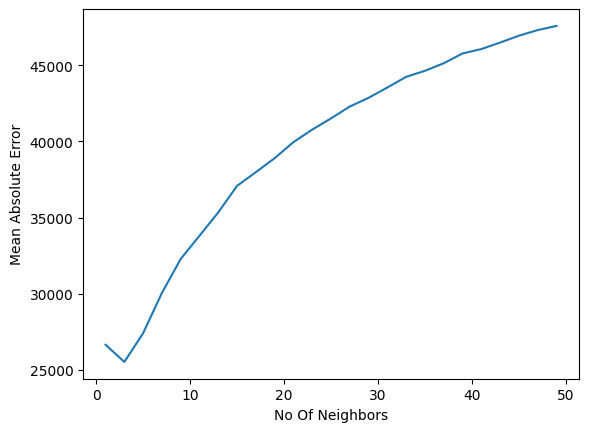

In [ ]:
plt.plot(x_ax,y_ax)
plt.xlabel('No Of Neighbors')
plt.ylabel('Mean Absolute Error')

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
clfsgd1=SGDRegressor()

In [ ]:
clfsgd1.fit(x_trainscaled,y_train)

SGDRegressor()

In [ ]:
ypredsgdscaled=clfsgd1.predict(x_testscaled)

In [ ]:
maesgdscaled=mean_absolute_error(ypredsgdscaled,y_test)

In [ ]:
clfsgd2=SGDRegressor()

In [ ]:
clfsgd2.fit(x_train,y_train)

SGDRegressor()

In [ ]:
ypredsgd=clfsgd2.predict(x_test)

In [ ]:
maesgd=mean_absolute_error(ypredsgd,y_test)

In [ ]:
maesgdscaled = mean_absolute_error(y_test, ypredsgdscaled)
msesgdscaled = mean_squared_error(y_test, ypredsgdscaled)
r2sgdscaled = r2_score(y_test, ypredsgdscaled)

# Print results
print("SGD Regression:")
print(f"Mean Absolute Error (MAE): {maesgdscaled}")
print(f"Mean Squared Error (MSE): {msesgdscaled}")
print(f"R² Score: {r2sgdscaled}")

SGD Regression:
Mean Absolute Error (MAE): 109566.0355798008
Mean Squared Error (MSE): 287637382213.40564
R² Score: 0.09695606813146873


In [ ]:
sgdmeanlist = [maesgd, maesgdscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

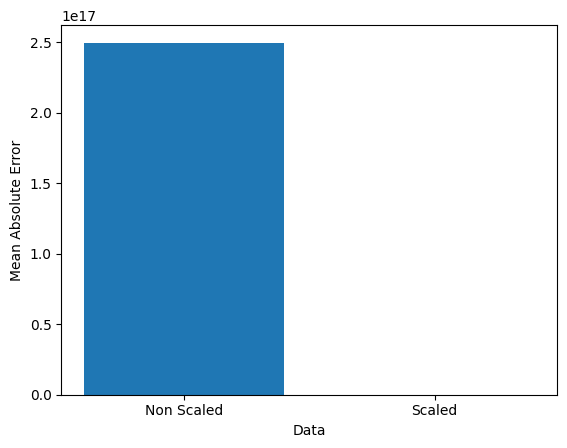

In [ ]:
plt.bar(namerandom,sgdmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
maesgd,maesgdscaled

(2.4946665091588573e+17, 109768.85094737695)

In [ ]:
meanlist = [maelinear, maekeras,maerandom,knnmae,]
name = ['Linear Regression', 'Keras ANN','Random Forest','KNN']

Text(0, 0.5, 'Mean Absolute Error')

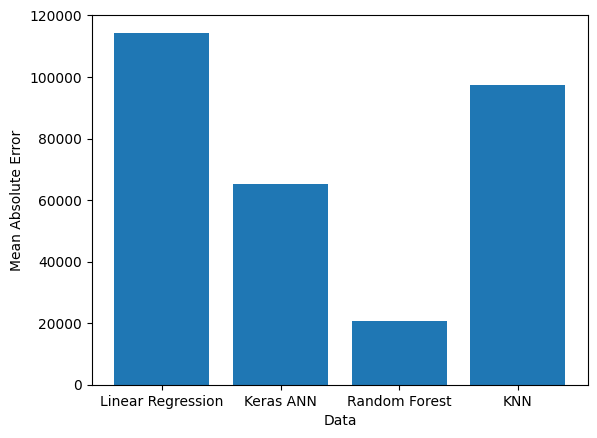

In [ ]:
plt.bar(name,meanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
meanlistscaled = [maelinearscaled, maekeras_scaled,maerandomscaled,maesgdscaled,knnmaescaled]
name = ['Linear Regression', 'Keras ANN','Random Forest','SGD','KNN']

Text(0, 0.5, 'Mean Absolute Error')

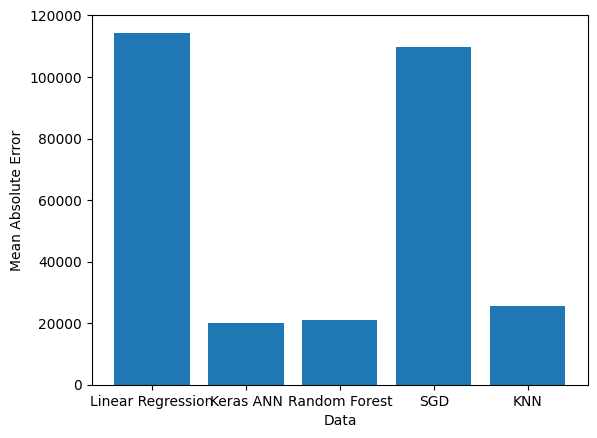

In [ ]:
plt.bar(name,meanlistscaled)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

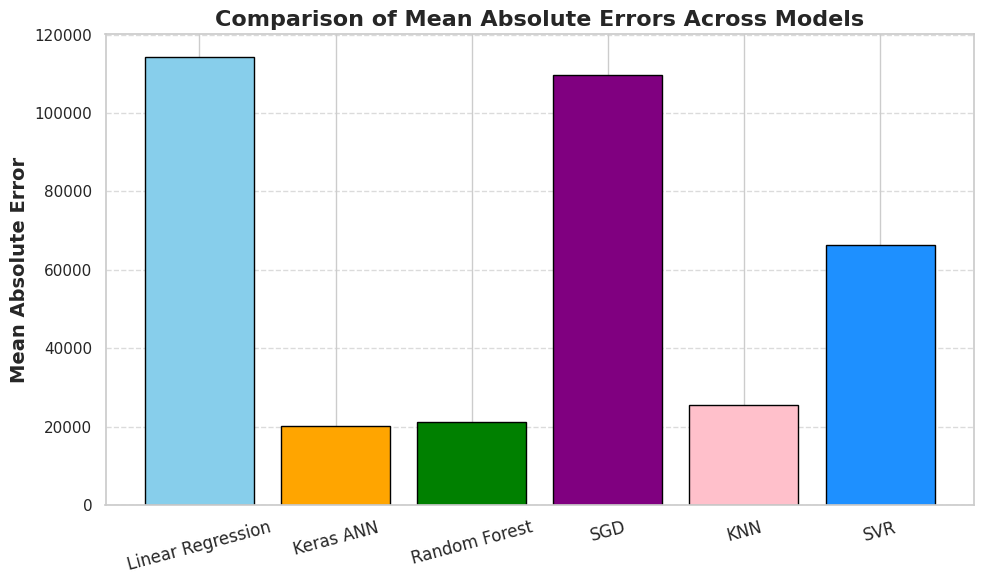

In [ ]:
maesvrscaled = mae_svr
meanlistscaled = [maelinearscaled, maekeras_scaled, maerandomscaled, maesgdscaled, knnmaescaled, maesvrscaled]
name = ['Linear Regression', 'Keras ANN', 'Random Forest', 'SGD', 'KNN', 'SVR']
plt.figure(figsize=(10, 6))
plt.bar(name, meanlistscaled, color=['skyblue', 'orange', 'green', 'purple', 'pink', 'dodgerblue'], edgecolor='black')
#plt.xlabel("Model", fontsize=14, fontweight='bold')
plt.ylabel("Mean Absolute Error", fontsize=14, fontweight='bold')
plt.title("Comparison of Mean Absolute Errors Across Models", fontsize=16, fontweight='bold')
plt.xticks(rotation=15, fontsize=12)  # Rotate x-axis labels slightly for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()
plt.savefig("maecomparison.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
num=[]
for i in range(x_testscaled.shape[0]):
    num.append(i+1)

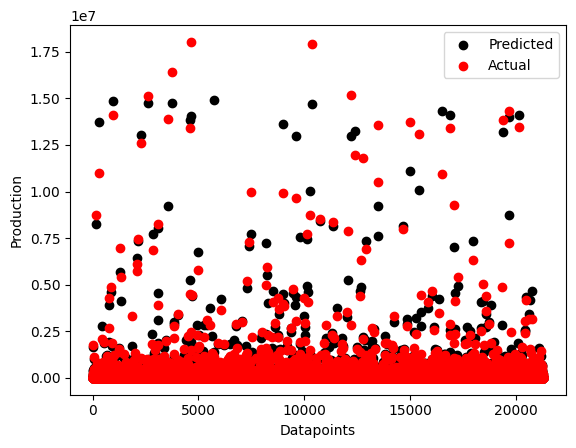

In [ ]:
plt.scatter(num, ypredranscaled, label="Predicted", color="black")
plt.scatter(num, y_test, label="Actual", color="red")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")
plt.show()

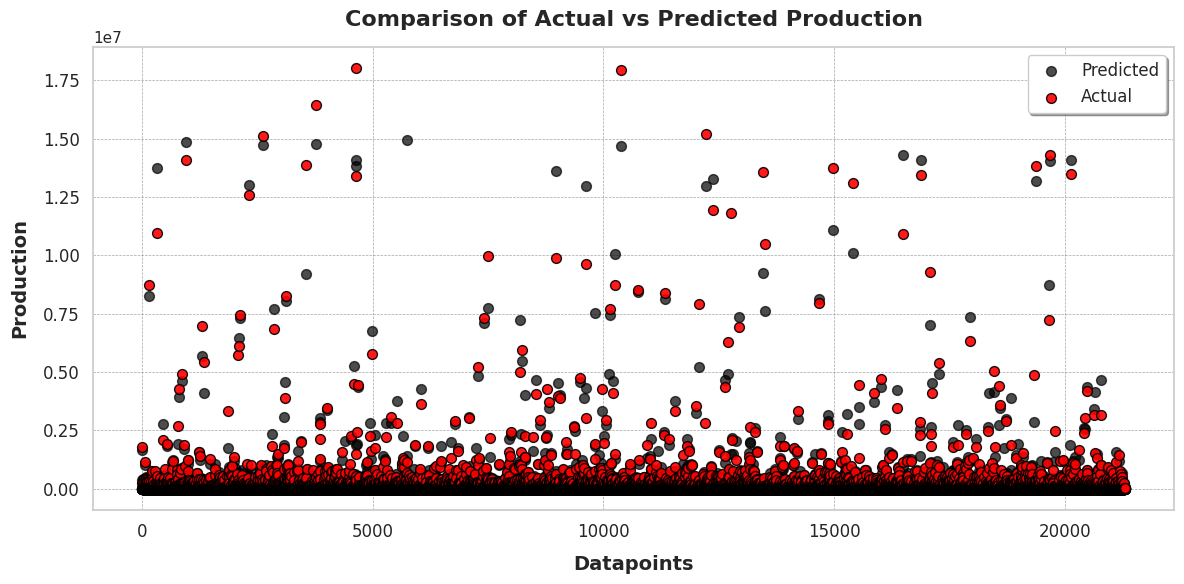

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.scatter(num, ypredranscaled,
            label="Predicted",
            color="black",
            alpha=0.7,
            edgecolor="black",
            s=50)

plt.scatter(num, y_test,
            label="Actual",
            color="red",
            alpha=0.9,
            edgecolor="black",
            s=50)

plt.xlabel("Datapoints", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Production", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Comparison of Actual vs Predicted Production", fontsize=16, fontweight="bold", pad=15)
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper right")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("scatter.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df_test.head(10)

,Area,Rainfall,Season,Temperature,Crop
0,28625.0,143.636000,1,28.299667,12
1,138347.0,8.579000,2,20.535500,14
2,610.0,56.610000,2,23.534750,7
3,200.0,223.255500,3,30.272250,5
4,33000.0,127.565667,1,26.343000,6
5,7700.0,71.837000,1,29.354333,13
6,7425.0,159.932333,1,28.107333,0
7,4842.0,132.896000,1,28.846667,0
8,842.0,127.488000,3,26.284500,5
9,4500.0,139.045333,1,26.061000,11


In [ ]:
test =  pd.read_csv("UttarPradeshData.csv")
test = test.drop(['Unnamed: 0'], axis=1)

In [ ]:
test = test.drop(['0'], axis=1)

In [ ]:
test.head(15)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,1,2,3,4,5,6,7
0,balrampur,2014,Kharif,Urad,108030.0,0.000000e+00,0.000000e+00
1,balrampur,2014,Kharif,Urad,84190.0,1.482197e-323,1.482197e-323
2,balrampur,2014,Kharif,Sugarcane,43539.0,6.952763e-310,0.000000e+00
3,balrampur,2014,Rabi,Wheat,90246.0,2.152572e-314,6.952764e-310
4,balrampur,2014,Rabi,Wheat,18087.0,0.000000e+00,1.976263e-323
5,balrampur,2014,Rabi,Rapeseed &Mustard,9629.0,0.000000e+00,0.000000e+00
6,agra,2014,Kharif,Urad,10164.0,1.149530e+02,2.829433e+01
7,agra,2014,Kharif,Sugarcane,1935.0,1.149530e+02,2.829433e+01
8,agra,2014,Kharif,Sesamum,495.0,1.149530e+02,2.829433e+01
9,agra,2014,Rabi,Wheat,136036.0,1.828000e+00,1.974325e+01


In [ ]:
test.loc[7][0]

<ipython-input-104-79ec504060eb>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test.loc[7][0]


'agra'

In [ ]:
testf = pd.DataFrame()
testf = testf.assign(area = test["5"])
testf = testf.assign(rainfall = test["6"])
testf = testf.assign(season = test["3"])
testf = testf.assign(temp = test["7"])
testf = testf.assign(crop = test["4"])

In [ ]:
testf.head(10)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,area,rainfall,season,temp,crop
0,108030.0,0.000000e+00,Kharif,0.000000e+00,Urad
1,84190.0,1.482197e-323,Kharif,1.482197e-323,Urad
2,43539.0,6.952763e-310,Kharif,0.000000e+00,Sugarcane
3,90246.0,2.152572e-314,Rabi,6.952764e-310,Wheat
4,18087.0,0.000000e+00,Rabi,1.976263e-323,Wheat
5,9629.0,0.000000e+00,Rabi,0.000000e+00,Rapeseed &Mustard
6,10164.0,1.149530e+02,Kharif,2.829433e+01,Urad
7,1935.0,1.149530e+02,Kharif,2.829433e+01,Sugarcane
8,495.0,1.149530e+02,Kharif,2.829433e+01,Sesamum
9,136036.0,1.828000e+00,Rabi,1.974325e+01,Wheat


In [ ]:
testf['season'] = se.transform(testf['season'])
testf['crop'] = cr.transform(testf['crop'])

In [ ]:
"""
#Enter from following Districts:
1.Lucknow
2.Agra
3.Aligarh
4.Jaunpur
5.Pratapgarh
6.Saharanpur
7.Meerut
8.Mahoba
9.Kheri
10.Ghazipur
11.Etawah
12.Gorakhpur
13.Bareilly
14.Allahabad
15.Basti
16.Ghaziabad
17.Mathura
18.Moradabad
19.Philibhit
20.Sitapur
"""

'\n#Enter from following Districts:\n1.Lucknow\n2.Agra\n3.Aligarh\n4.Jaunpur\n5.Pratapgarh\n6.Saharanpur\n7.Meerut\n8.Mahoba\n9.Kheri\n10.Ghazipur\n11.Etawah\n12.Gorakhpur\n13.Bareilly\n14.Allahabad\n15.Basti\n16.Ghaziabad\n17.Mathura\n18.Moradabad\n19.Philibhit\n20.Sitapur\n'

In [ ]:
print("Enter name of district: ")
name = input()

Enter name of district: 
Agra


In [ ]:
name = name.lower()
name

'agra'

In [ ]:
x = []
area = []
for i in range(len(test)):
    if test.iloc[i,0] == name:
        df = pd.DataFrame()
        df = testf.iloc[i]
        df = np.array(df)
        df = df.reshape((1, 5))
        df = pd.DataFrame(df)
        area.append((testf.iloc[i,0], testf.iloc[i,4]))
        x.append(df)

In [ ]:
df = pd.concat(x)

In [ ]:
df

,0,1,2,3,4
0,10164.0,114.953,1.0,28.294333,13.0
0,1935.0,114.953,1.0,28.294333,12.0
0,495.0,114.953,1.0,28.294333,11.0
0,136036.0,1.828,2.0,19.743250,14.0
0,67228.0,1.828,2.0,19.743250,9.0
0,45613.0,1.828,2.0,19.743250,8.0


In [ ]:
x=df.values

In [ ]:
x=scaler.transform(x)

In [ ]:
ypred = clf1.predict(x)

In [ ]:
ypred

array([   4546.87      ,  114739.098     ,    2522.92305919,
        378870.24      ,  231259.22      , 1278048.49      ])

In [ ]:
type(ypred), type(area)

(numpy.ndarray, list)

In [ ]:
ypred.shape, len(area)

((6,), 6)

In [ ]:
yld = []
cnt=0
for i, j in area:
    yld.append((ypred[cnt] / i , j))
    cnt+=1

In [ ]:
for i, j in yld:
    print(i, j)

0.4473504525777253 13
59.296691472868226 12
5.096814260991561 11
2.7850733629333413 14
3.4399241387517105 9
28.019391182338367 8


In [ ]:
kharif = []
cnt=0
for i, j in yld:
    if cnt == 3:
        break
    kharif.append((i, j))
    cnt+=1
cnt=1
rabi = []
for i, j in yld:
    if cnt<=3:
        cnt+=1
        continue
    rabi.append((i, j))

In [ ]:
len(kharif), len(rabi)

(3, 3)

In [ ]:
kharif.sort(reverse = True)
rabi.sort(reverse = True)

In [ ]:
len(kharif), len(rabi)

(3, 3)

In [ ]:
anskharif = []
for i, j in kharif:
    print(i, j)
    j_ = cr.inverse_transform([int(j)])[0]
    anskharif.append((i, j_))
ansrabi = []
for i, j in rabi:
    j_ = cr.inverse_transform([int(j)])[0]
    ansrabi.append((i, j_))

59.296691472868226 12
5.096814260991561 11
0.4473504525777253 13


In [ ]:
for i, j in anskharif:
    print("Crop: ",j," , ","Yield:", i)

Crop:  Sugarcane  ,  Yield: 59.296691472868226
Crop:  Sesamum  ,  Yield: 5.096814260991561
Crop:  Urad  ,  Yield: 0.4473504525777253


In [ ]:
for i, j in ansrabi:
    print("Crop: ",j," , ","Yield:", i)

Crop:  Potato  ,  Yield: 28.019391182338367
Crop:  Rapeseed &Mustard  ,  Yield: 3.4399241387517105
Crop:  Wheat  ,  Yield: 2.7850733629333413


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store results
results = {}

# Function to evaluate a model
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Random Forest
evaluate_model("Random Forest (Unscaled)", y_test, clf1.predict(x_test))
evaluate_model("Random Forest (Scaled)", y_test, clf1.predict(x_testscaled))

# Keras ANN
evaluate_model("Keras ANN (Unscaled)", y_test, model1.predict(x_test).flatten())
evaluate_model("Keras ANN (Scaled)", y_test, model1.predict(x_testscaled).flatten())

# SGD
evaluate_model("SGD (Unscaled)", y_test, clfsgd2.predict(x_test))
evaluate_model("SGD (Scaled)", y_test, clfsgd1.predict(x_testscaled))

# Linear Regression
evaluate_model("Linear Regression (Unscaled)", y_test, clf_linear.predict(x_test))
evaluate_model("Linear Regression (Scaled)", y_test, clf_linearscaled.predict(x_testscaled))

# SVR
evaluate_model("SVR (Scaled)", y_test, svr_model.predict(x_test))

# KNN
evaluate_model("KNN (Unscaled)", y_test, clfKNN.predict(x_test))
evaluate_model("KNN (Scaled)", y_test, clfKNN1.predict(x_testscaled))

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)



NameError: name 'y_test' is not defined